In [19]:
#There may be no subject more boring than insurance.  In the movie Groundhog Day, the main character
#was stuck living in one day over and over, nothing new, no surprises.  Even in that scenario, the 
#most comically boring and tedious aspect of the day was the insurance guy.  That's how boring
#insurance is.  Is there any way to spice it up?  Is there a way to present insurance information 
#in a way that is visually interesting while still communicating the relevant information?  
#Let's give it a shot.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [36]:
#first I'll pull in the data.  I'm going to use premium payment information on 30 year term life 
#insurance for a 40 year old male in reasonably good health.  Pulled from an online calculator.
term = pd.read_csv(r"C:\Users\danbr\OneDrive\Documents\Data Science\Term LIfe class comparison.csv")

In [37]:
#There are different classes you can be in, based on your health.  There is Preferred Best, Preferred,
#Nonsmoker Plus, Nonsmoker, Preferred Smoker, and Smoker.  There are also payment schedule options.
#You can pay annually, semi-annually, quarterly, or monthly.  This data describes the premium you
#would pay at each class for each schedule option:
print(term)

             Class and Schedule  Premium
0         Preferred Best Annual      415
1     Preferred Best SemiAnnual      423
2      Preferred Best Quarterly      432
3        Preferred Best Monthly      436
4              Preferred Annual      513
5          Preferred SemiAnnual      523
6           Preferred Quarterly      533
7             Preferred Monthly      538
8         NonSmoker Plus Annual      670
9     NonSmoker Plus SemiAnnual      683
10     NonSmoker Plus Quarterly      697
11       NonSmoker Plus Monthly      704
12             NonSmoker Annual      823
13         NonSmoker SemiAnnual      839
14          NonSmoker Quarterly      855
15            NonSmoker Monthly      864
16      Preferred Smoker Annual     1843
17  Preferred Smoker SemiAnnual     1879
18   Preferred Smoker Quarterly     1916
19     Preferred Smoker Monthly     1935
20                Smoker Annual     2270
21            Smoker SemiAnnual     2315
22             Smoker Quarterly     2361
23              

In [38]:
#This is not the most interesting way to present this data.  Let's try one of my favorites:
# a radial bar chart.  First let's make a new object to build it on, based on the data.
radial=term

In [39]:
#Checking it out.  Yep.  That's the data.
print(radial)

             Class and Schedule  Premium
0         Preferred Best Annual      415
1     Preferred Best SemiAnnual      423
2      Preferred Best Quarterly      432
3        Preferred Best Monthly      436
4              Preferred Annual      513
5          Preferred SemiAnnual      523
6           Preferred Quarterly      533
7             Preferred Monthly      538
8         NonSmoker Plus Annual      670
9     NonSmoker Plus SemiAnnual      683
10     NonSmoker Plus Quarterly      697
11       NonSmoker Plus Monthly      704
12             NonSmoker Annual      823
13         NonSmoker SemiAnnual      839
14          NonSmoker Quarterly      855
15            NonSmoker Monthly      864
16      Preferred Smoker Annual     1843
17  Preferred Smoker SemiAnnual     1879
18   Preferred Smoker Quarterly     1916
19     Preferred Smoker Monthly     1935
20                Smoker Annual     2270
21            Smoker SemiAnnual     2315
22             Smoker Quarterly     2361
23              

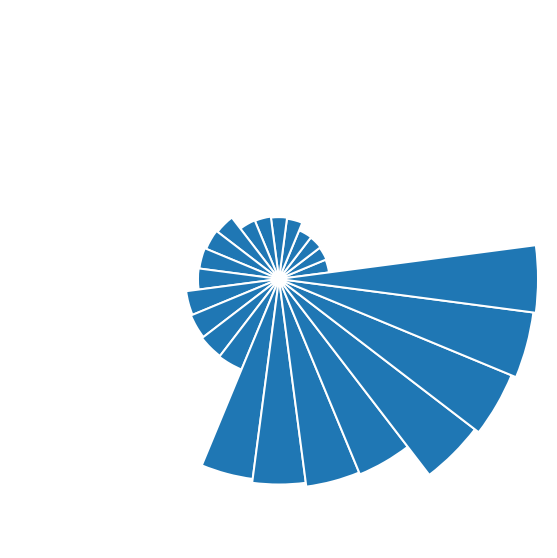

In [44]:
#All right, let's plot out this radial chart.  matplotlib has a ton of options for tables, charts,
# and so forth.
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')
upperLimit = 100
lowerLimit = 30
max = radial['Premium'].max()
slope = (max - lowerLimit) / max
heights = slope * radial.Premium + lowerLimit
width = 2*np.pi / len(radial.index)
indexes = list(range(1, len(radial.index)+1))
angles = [element * width for element in indexes]
angles
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white")

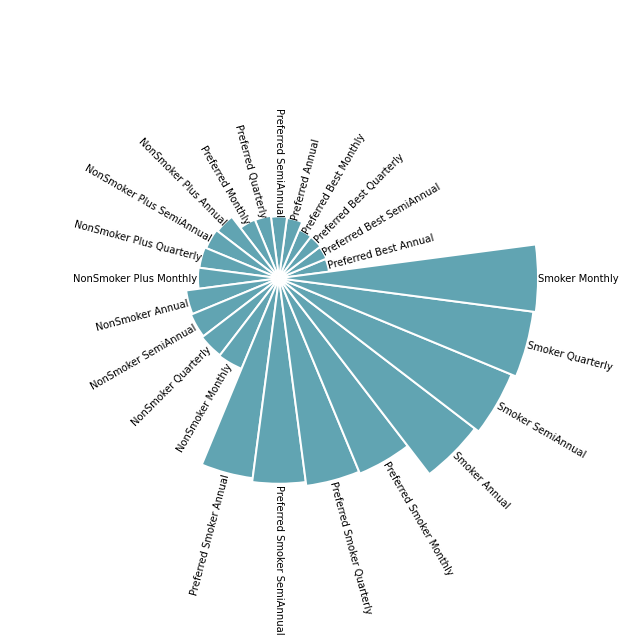

In [47]:
#Well, it's a radial.  But it's not telling us anything.  We need labels!
#It's tricky to line up the labels in a way that is legible.  
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)
labelPadding = 4
for bar, angle, height, label in zip(bars,angles, heights, radial["Class and Schedule"]):
    rotation = np.rad2deg(angle)
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

In [60]:
#Wow.  I'll tell you what jumps out to me: Don't smoke!  Look how drastically the premiums
#jump for the smoking classes!  That is striking.
#But let's assume the person we're presenting this to is not a smoker.  So this graph isn't what 
#they need.  Let's bring in a new table, breaking down by class and schedule again, but also 
#showing the difference in the time frames of the policy.  So far we've done 30 year, but a lot of 
#the decision-making in looking at insurance is about how long you need to be covered.
full= pd.read_csv(r"C:\Users\danbr\OneDrive\Documents\Data Science\Insurance Class and Schedule.csv")

In [61]:
#I added a column labelled "code".  The code gives a numerical value to the class and schedule.
#Preferred Best is 10, Preferred is 20, and so on.  Then for the schedule annual is 1, semi-
#annual is 2, etc.  So Preferred Best Annual is 11, Preferred Annual is 21, etc.
print(full)

                        Class  Ten  Fifteen  Twenty  Thirty  Code
0       Preferred Best Annual  223      240     293     415    11
1   Preferred Best SemiAnnual  227      245     298     423    12
2    Preferred Best Quarterly  231      250     304     432    13
3      Preferred Best Monthly  234      252     307     436    14
4            Preferred Annual  273      288     350     513    21
5        Preferred SemiAnnual  278      293     357     523    22
6         Preferred Quarterly  283      299     364     533    23
7           Preferred Monthly  286      302     368     538    24
8       NonSmoker Plus Annual  320      338     450     670    31
9   NonSmoker Plus SemiAnnual  326      344     459     683    32
10   NonSmoker Plus Quarterly  333      351     468     697    33
11     NonSmoker Plus Monthly  336      354     473     704    34
12           NonSmoker Annual  450      480     568     823    41
13       NonSmoker SemiAnnual  459      490     579     839    42
14        

In [62]:
#I wanted a numerical value for class and schedule so I could easily plot it into a graph.
#First I'll get that Code column into a numpy array.
code= full[['Code']].to_numpy()

In [64]:
#Let's check it out.
print(code)

[[11]
 [12]
 [13]
 [14]
 [21]
 [22]
 [23]
 [24]
 [31]
 [32]
 [33]
 [34]
 [41]
 [42]
 [43]
 [44]]


In [52]:
#Now let me get the columns for 10 year, 15, 20, and 30 years into numpy.
ten= full[['Ten']].to_numpy()
fifteen= full[['Fifteen']].to_numpy()
twenty= full[['Twenty']].to_numpy()
thirty= full[['Thirty']].to_numpy()

In [54]:
#Let's check it out.
print(ten)

[[223]
 [227]
 [231]
 [234]
 [273]
 [278]
 [283]
 [286]
 [320]
 [326]
 [333]
 [336]
 [450]
 [459]
 [468]
 [473]]


In [55]:
#Looks good.  Is it a numpy array?
type(ten)

numpy.ndarray

In [67]:
#It sure is!  So let's try doing a scatterplot.  We'll assign the x and y as code and ten:
x=(code)
y=(ten)

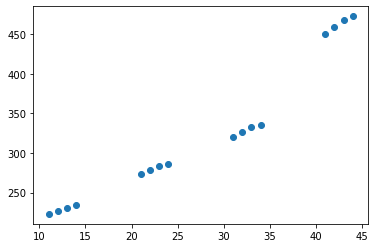

In [68]:
#matplotlib makes it easy!
plt.scatter(x, y)

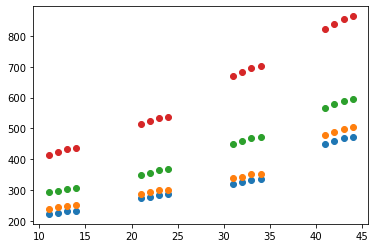

In [71]:
#Cool.  The premiums for 10 year policies are grouped by 4s (Annual, Semi-annual, Quarterly, Monthly)
#at each class level (Preffered best on the left, Nonsmoker on the right)
#Let's compare all the rates.
x=code
y=ten
plt.scatter(x, y)

x=code
y= fifteen
plt.scatter(x, y)

x=code
y= twenty
plt.scatter(x, y)

x=code
y= thirty
plt.scatter(x, y)
plt.show()

In [1]:
#Nice!  Now we're getting somewhere.  If you're a 40 year old male looking at this, you'd see that
#the 30 year rates are way up there.  20 years aren't so bad.  10-15 years are not that different.  
#I guess being in your 50's is WAY different than being in your 70's, as far as life-expectancy goes.
#Isn't it interesting, by the way, that the 15 year (orange) is not sitting right at the midpoint 
#of 10 (blue) and 20 (green)?  Indicating 50-55 is a much safer age than 55-60, I guess.  Or it could 
#just be that the longer the time period, the more that could go wrong.  It might not be about age.

In [ ]:
#Hopefully these visualizations are a bit more interesting to you than the normal charts these
#numbers usually arrive in.